# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Team_CB4_Classification**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Our company has been awarded the task to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is able to classify if a person believes in climate change;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re # regular Expressions Library
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from wordcloud import WordCloud
#import get_duplicate_features
# Libraries for data preparation and model building

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###
import warnings 
warnings.filterwarnings("ignore")
print('All Liraries imported Successfully ')

All Liraries imported Successfully 


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv('https://raw.githubusercontent.com/Advanced-Classification/Data/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Advanced-Classification/Data/main/test_with_no_labels.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Basic Analysis

After loading in our dataset,we coduct the Exploratory Data Analysis in oder to get a better understanding of the data and to gain some insights about the features, by performing Univariate or Multivariate , Non-graphical or Graphical Analysis

We will  look at the first few rows of the training and testing dataset to have an overview of our features  using pd.head() method and then after combining the two data set so that we can work on one data set.

In [3]:
# looking at the first five rows of the df_train
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


We have two features and one label
- features inludes: message and tweetid
- label: sentiment

In [4]:
# looking at the first five rows of the df_test
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


Test dataFrame contains only the features

We will look at the shape of our new dataframe to see the number of rows and the columns

In [5]:
#checking the total number of rows and columns on our new data
df_train.shape

(15819, 3)

 We have 26365 rows of data and 3 features on our new data set.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


- This command  shows us that out of the 26365 entries, the sentiment feature contains  null values.
- It also shows that we have the categorical and numerical features


In [7]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This confirms that there are 10546 null values in the data.

In [8]:
#checking for unique values 
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

our new data has 4 unique label.

According to the  description of the data, here is what each value stands for..

- 1 Pro: the tweet supports the belief of man-made climate change
- 2 News: the tweet links to factual news about climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change


In [9]:
#checking the tweetid to see if there are any duplicate id's
df_train['tweetid'].nunique()

15819

It looks we have 26365 duplicate value from the tweetidcolumn

In [10]:
#taking a colser look on the message column
df_train['message']

0        PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
1                                                                                      It's not like we lack evidence of anthropogenic global warming
2        RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3                                                 #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4                          RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight
                                                                             ...                                                                     
15814    RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care.

looking at the message column, it shows the presence of some unwanted characters which may prove to be redundant when building our model.

### Univariate Analysis: Non-Graphical

In [11]:
# look at data statistics
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [12]:
#checking the outliers using the kurtosis
df_train.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

Indicates a lack of outliers for all features.

### Univariate Analysis: Graphical

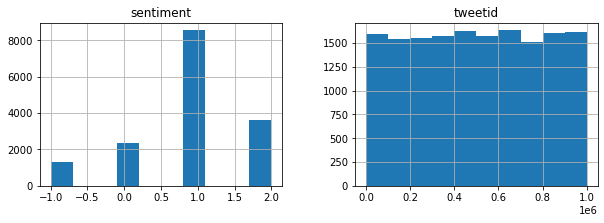

In [13]:
# look at the distribution of any numerical feature
features = ['sentiment','tweetid']
df_train[features].hist(figsize=(10,3));

- The sentiment histogram shows that the highest proportion of the tweets supports the belief of man-made climate change
- The teweetid is too noisy 

### Multivariate Analysis: Non-Graphical

In [14]:
# evaluate correlation
df_train.corr()

,sentiment,tweetid
sentiment,1.000000,-0.003758
tweetid,-0.003758,1.000000


There is a very weak correlation between sentiment and tweetid


### Multivariate Analysis: Graphical

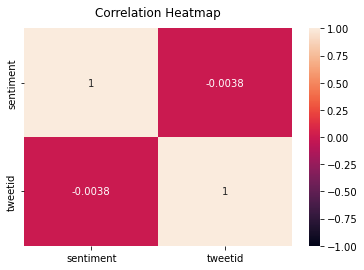

In [15]:
# have a look at feature distributions
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Feature Extration
Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable
by a classifier.The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict.
It yields better results than applying machine learning directly to the raw data.

In order to do this the following were carried out:
- Converting all of the words to lower case for consistency.
- Removal of punctuation (” “) and special characters from each sentence in the predictor variable.
- Removal of common English stop words. Stop words are words whose presence do not alter the meaning of a sentence.
- Eliminating all one-lettered words e.g a, I

In [16]:
#Converting everything to lowercase
df_train['message'] = df_train['message'].str.lower()

In [17]:
df_train.head()

,sentiment,message,tweetid
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via @mashable",625221
1,1,it's not like we lack evidence of anthropogenic global warming,126103
2,2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change https://t.co/44wotxtlcd,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",466954


In [18]:
# function for removing @
def remove_char(input_text, characters):
    regularEx = re.findall(characters, input_text)
    for i in regularEx:
        input_text = re.sub(i,' ',input_text)
        return input_text

In [19]:
#removing the @
df_train['Initial_message'] = np.vectorize(remove_char)(df_train['message'],'@[\w]*')

In [20]:
df_train.tail()

,sentiment,message,tweetid,Initial_message
15814,1,"rt @ezlusztig: they took down the material on global warming, lgbt rights, and health care. but now they're hocking melania's qvc. https://…",22001,"rt : they took down the material on global warming, lgbt rights, and health care. but now they're hocking melania's qvc. https://…"
15815,2,rt @washingtonpost: how climate change could be breaking up a 200-million-year-old relationship https://t.co/rpfgvb2plq,17856,rt : how climate change could be breaking up a 200-million-year-old relationship https://t.co/rpfgvb2plq
15816,0,notiven: rt: nytimesworld :what does trump actually believe about climate change? rick perry joins other aides in … https://t.co/0mp2,384248,None
15817,-1,rt @sara8smiles: hey liberals the climate change crap is a hoax that ties to #agenda2030.\nthe climate is being changed byã¢â‚¬â¦,819732,rt : hey liberals the climate change crap is a hoax that ties to #agenda2030.\nthe climate is being changed byã¢â‚¬â¦
15818,0,rt @chet_cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7uufcxdq,806319,rt : .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7uufcxdq


In [21]:
#Removing the http and urls from tweets
df_train['message'] = df_train['message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [22]:
df_train.head()

,sentiment,message,tweetid,Initial_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,it's not like we lack evidence of anthropogenic global warming,126103,None
2,2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change,573736,None
4,1,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"


In [23]:
#removing punctuation and special characters
df_train['message'] = df_train['message'].str.replace('[^a-zA-Z#]+',' ')

In [24]:
df_train.tail(5)

,sentiment,message,tweetid,Initial_message
15814,1,rt ezlusztig they took down the material on global warming lgbt rights and health care but now they re hocking melania s qvc,22001,"rt : they took down the material on global warming, lgbt rights, and health care. but now they're hocking melania's qvc. https://…"
15815,2,rt washingtonpost how climate change could be breaking up a million year old relationship,17856,rt : how climate change could be breaking up a 200-million-year-old relationship https://t.co/rpfgvb2plq
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248,None
15817,-1,rt sara smiles hey liberals the climate change crap is a hoax that ties to #agenda the climate is being changed by,819732,rt : hey liberals the climate change crap is a hoax that ties to #agenda2030.\nthe climate is being changed byã¢â‚¬â¦
15818,0,rt chet cannon kurteichenwald s climate change equation in screenshots,806319,rt : .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7uufcxdq


In [25]:
#Removing Short words
df_train['message'] = df_train['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [26]:
df_train.head(5)

,sentiment,message,tweetid,Initial_message
0,1,polyscimajor epa chief doesn think carbon dioxide main cause global warming and wait what,625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,not like lack evidence anthropogenic global warming,126103,None
2,2,rawstory researchers say have three years act climate change before too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wired was pivotal year the war climate change,573736,None
4,1,soynoviodetodas and racist sexist climate change denying bigot leading the polls #electionnight,466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [29]:
#Creating tokenized tweet
tokenized_tweet = df_train['message'].apply(lambda x: x.split())

In [30]:
df_train.head(10)

,sentiment,message,tweetid,Initial_message
0,1,polyscimajor epa chief doesn think carbon dioxide main cause global warming and wait what,625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,not like lack evidence anthropogenic global warming,126103,None
2,2,rawstory researchers say have three years act climate change before too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wired was pivotal year the war climate change,573736,None
4,1,soynoviodetodas and racist sexist climate change denying bigot leading the polls #electionnight,466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"
5,1,worth read whether you don believe climate change,425577,None
6,1,thenation mike pence doesn believe global warming that smoking causes lung cancer,294933,rt : mike pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvwyaauu8r
7,1,makeandmendlife six big things can all today fight climate change how climate activist,992717,"rt : six big things we can all do today to fight climate change, or how to be a climate activistã¢â‚¬â¦ https://t.co/tymlu6dbnm hã¢â‚¬â¦"
8,1,aceofspadeshq nephew inconsolable wants die old age like but will perish the fiery hellscape climate change,664510,"my 8yo nephew is inconsolable. he wants to die of old age like me, but will perish in the fiery hellscape of climate change."
9,1,paigetweedy offense but like how you just not believe global warming,260471,rt : no offense… but like… how do you just not believe… in global warming………


In [31]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [32]:
df_train.head(2)

,sentiment,message,tweetid,Initial_message
0,1,polyscimajor epa chief doesn think carbon dioxide main cause global warming and wait what,625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,not like lack evidence anthropogenic global warming,126103,None


In [33]:
# join tokens into one sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [34]:
df_train['message']  = tokenized_tweet

In [35]:
df_train.head(2)

,sentiment,message,tweetid,Initial_message
0,1,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what,625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,not like lack evid anthropogen global warm,126103,None


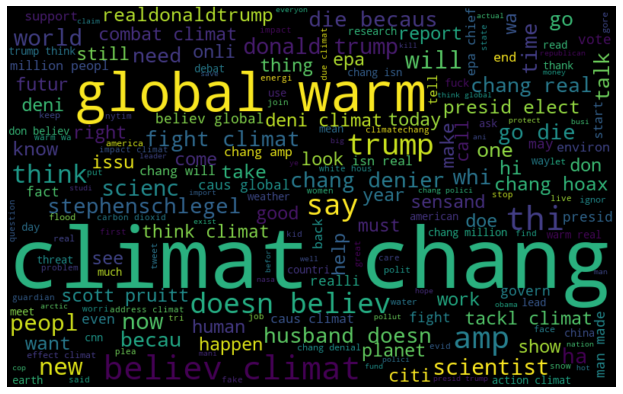

In [36]:
all_words = ' '.join([text for text in df_train['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more classification models that are able to accurately predict whether or not a person believes in climate change, based on their novel tweet data. |

---

In [37]:
# split data

In [38]:
# create targets and features dataset

In [39]:
# create one or more ML models

In [40]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [41]:
# Compare model performance

In [42]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [43]:
# discuss chosen methods logic